# KC 2: BMW v. GM model
**by Zach Zhao**


## Preliminary Work

Below, we read the file, convert to a dataframe, and select our levels: BMW and GM. Here are the first couple entries for BMW and GM:

In [39]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import pearsonr
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm

In [15]:
df = pd.read_excel("unit two take home data.xlsx")

In [49]:
bmw = df[df["Mfr Name"] == "BMW"]
# bmw.head()

In [50]:
gm = df[df["Mfr Name"] == "General Motors"]
# gm.head()

In [18]:
gm_city = gm["City FE (Guide) - Conventional Fuel"]
bmw_city = bmw["City FE (Guide) - Conventional Fuel"]

gm_high = gm["Hwy FE (Guide) - Conventional Fuel"]
bmw_high = bmw["Hwy FE (Guide) - Conventional Fuel"]

## Problem 1
Can we predict highway mileage from from city mileage better or worse for BMWs vs General Motors cars?

## Problem 2a
The scatterplot below shows the relationship between Hwy FE vs City FE of General Motors cars. Both variables in this graph, Hwy FE and City FE, are quantitative. The scatterplot does not appear to have any outliers. The group of points looks relatively straight (positive correlation), so a linear regression is most likely applicable.

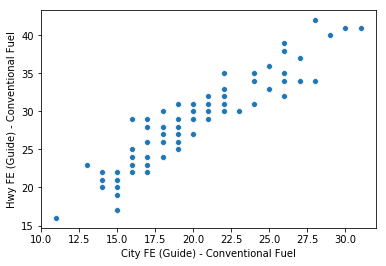

In [24]:
sns.scatterplot(gm_city, gm_high)

## Problem 2b

The scatterplot below shows the relationship between Hwy FE vs City FE of BMW cars. Both variables in this graph, Hwy FE and City FE, are quantitative. The scatterplot does not appear to have any outliers. The group of points looks relatively straight (positive correlation), so a linear regression is most likely applicable.

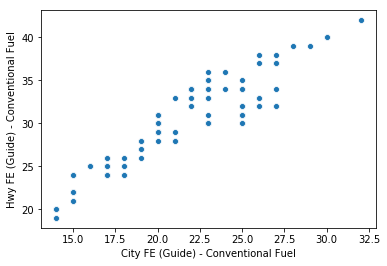

In [25]:
sns.scatterplot(bmw_city, bmw_high)

## Problem 3

Both residual plots, BMW and GM, show a random scatter, horizontal direction, and a shapeless form. This suggests that a linear regression line would appropiate.

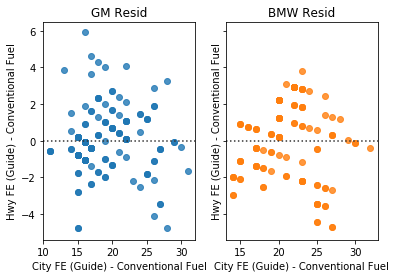

In [31]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
ax1.set_title("GM Resid")
ax2.set_title("BMW Resid")
sns.residplot(gm_city, gm_high, ax = ax1)
sns.residplot(bmw_city, bmw_high, ax = ax2)

## Problem 4

There appears to be no outlying points in both plots, BMW and GM.

## Problem 5 

Below are the linear regression results of BMW and GM levels.

BMW equation: $\hat{y} = 6.109 + 1.133x$

GM equation: $\hat{y} = 2.196 + 1.305x$

In [44]:
stats.linregress(bmw_city, bmw_high)

LinregressResult(slope=1.1333054508008031, intercept=6.108921121721302, rvalue=0.905941027855879, pvalue=7.327094022518994e-52, stderr=0.04575615198500574)

In [38]:
stats.linregress(gm_city, gm_high)

LinregressResult(slope=1.305194899878557, intercept=2.196347593148488, rvalue=0.9555149631477106, pvalue=8.194186637981162e-88, stderr=0.03165322154664224)

## Problem 6

The slope of the BMW equation is the predicted increase (1.133 MPG) in HWY FE for each unit (MPG) increase in City FE of a BMW car. 

The y intercept of the GM equation is the predicted Hwy FE (2.196 MPG) for a GM car that has zero city FE.

## Problem 7

BMW Hwy FE Variance: 24.074

GM Hwy FE Variance: 33.304


In [46]:
stats.describe(bmw_high)

DescribeResult(nobs=136, minmax=(19, 42), mean=30.0, variance=24.251851851851853, skewness=-0.23232346514470098, kurtosis=-0.4219434585593018)

In [45]:
stats.describe(gm_high)

DescribeResult(nobs=164, minmax=(16, 42), mean=26.859756097560975, variance=33.507818345054616, skewness=0.4972609335653556, kurtosis=-0.42371340652137146)

## Problem 8

$ \sum{(y_{BMW} - \hat{y}_{BMW})^{2}} = var_{BMW} * (1 - r^{2}_{BMW}) = 4.317 $

$ \sum{(y_{GM} - \hat{y}_{GM})^{2}} = var_{GM} * (1 - r^{2}_{GM}) = 2.898 $

## Problem 9

$r^{2}_{BMW}$ = 0.82

$r^{2}_{GM}$ = 0.91

## Problem 10

The $r^2$ value describes the fraction of the error (y variable variance) accounted by the linear regression line. The higher the value, the more the line accounts for the error. Correspondingly, an high $r^2$ value would mean a smaller residual error (MSE). The variance, MSE and $r^2$ are related by this equation:

$ \sum{(y_{BMW} - \hat{y}_{BMW})^{2}} = \sum{(y_{BMW} - \bar{y}_{BMW})^{2}} * (1 - r^{2}_{BMW})$

## Problem 11

Based on my solutions from Problems 2 - 9, I conclude that the GM model is better than the BMW model at predicting the expected Hwy FE from their respective City FE. In problems 2 - 4, we established that a linear model is appropiate for both situations. All of the data is quantitative, the plots don't show any apparent outliers, and the data looks relatively straight, with a positive correlation. In problems 5 - 10, we analyzed the error in our linear model. The r squared value for BMW is less than GM's. Additionally, the MSE in our regression models, the residuals, is greater in BMW than GM. Therefore, we conclude that the GM model for predicting Hwy FE from City FE is more effective than the BMW model. 